# TensorFlow Classification

- The goal of this example, is to read in a dataset of medical information from various patients and find their proper classification, using the 'Class' of the individual.

In [25]:
import pandas as pd

In [26]:
# Dataframe
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')

In [27]:
# Checking the dataframe read
diabetes_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


#### Note: Column 'Group' is added to the dataset to understand how to handle categorical strings.

In [28]:
# Get dataframe columns to normalize (clean) data. 
diabetes_data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [29]:
# Since we're trying to predict 'Class' as the label group we will exclude that from being normalized. 
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

#### Note: 'Group' was excluded due to being a string label, and 'Age' will be used as a categorical column. 

### Cleaning/Normalizing Data

In [30]:
# Normalizing columns using a lambda expression - similar to R. 
diabetes_data[cols_to_norm] = diabetes_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [31]:
# Check normalized data
diabetes_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [32]:
import tensorflow as tf

In [33]:
diabetes_data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Features: Continuous Values

In [34]:
# Set up feature columns
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Handling Non-Continuous Values (Variables/Weights): Vocabulary Lists & Hash Buckets

In [35]:
#Vocabulary list approach:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A', 'B', 'C', 'D'])

#### Note: 'Group' becomes our key w/ four possible categories: A, B, C, & D.

In [14]:
# If a categorical group is NOT provided in the dataset, a hash bucket can be used instead. 
# Hash bucket approach:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

### Feature Engineering: Continous Columns to Categorical Columns

#### Wikipedia: https://en.wikipedia.org/wiki/Feature_engineering

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

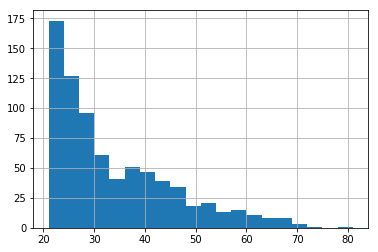

In [37]:
# Visualize our continous column 'Age', which will become a categorical column
diabetes_data['Age'].hist(bins = 20)

#### Note: We can bucket these values and provide boundries for each decade.

In [38]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20,30,40,50,60,70,80])

In [18]:
# Create a list of feature columns
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [39]:
# Modify dataframe to drop the labels from 'Class'. 
x_data = diabetes_data.drop('Class', axis = 1)

In [40]:
# Test output of columns
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [41]:
labels = diabetes_data['Class']

In [44]:
# Test output of labels
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

### Train/Test Split

#### Note: 70% - 30% Train/Test

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [49]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                                batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [50]:
# Linear graph model for testing purposes
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_model_dir': '/var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpivhs3bcn', '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_keep_checkpoint_max': 5}


In [51]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpivhs3bcn/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 507.226
INFO:tensorflow:step = 101, loss = 7.31918 (0.200 sec)
INFO:tensorflow:global_step/sec: 611.266
INFO:tensorflow:step = 201, loss = 6.35178 (0.162 sec)
INFO:tensorflow:global_step/sec: 667.766
INFO:tensorflow:step = 301, loss = 4.82177 (0.150 sec)
INFO:tensorflow:global_step/sec: 659.627
INFO:tensorflow:step = 401, loss = 6.46892 (0.152 sec)
INFO:tensorflow:global_step/sec: 641.559
INFO:tensorflow:step = 501, loss = 5.29162 (0.156 sec)
INFO:tensorflow:global_step/sec: 635.078
INFO:tensorflow:step = 601, loss = 4.92334 (0.158 sec)
INFO:tensorflow:global_step/sec: 440.079
INFO:tensorflow:step = 701, loss = 5.7081 (0.229 sec)
INFO:tensorflow:global_step/sec: 468.911
INFO:tensorflow:step = 801, loss = 5.39763 (0.212 sec)
INFO:tensorflow:global_step/s

In [52]:
# Standard time-step
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                     batch_size = 10,
                                                     num_epochs = 1,
                                                     shuffle = False)

In [53]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-12-31-22:05:22
INFO:tensorflow:Restoring parameters from /var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpivhs3bcn/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-12-31-22:05:23
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.801029, auc_precision_recall = 0.648696, average_loss = 0.526189, global_step = 1000, label/mean = 0.350649, loss = 5.06457, prediction/mean = 0.374981


In [54]:
results # 74% accuracy on first pass

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80102885,
 'auc_precision_recall': 0.64869571,
 'average_loss': 0.52618903,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0645695,
 'prediction/mean': 0.37498116}

In [55]:
# Pass in test data
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,
                                                     batch_size = 10,
                                                     num_epochs = 1,
                                                     shuffle = False)

In [56]:
predictions = model.predict(pred_input_func)

In [57]:
# List of class dictionary predictions
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpivhs3bcn/model.ckpt-1000


In [58]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.51425624], dtype=float32),
  'logits': array([ 0.05704045], dtype=float32),
  'probabilities': array([ 0.48574376,  0.51425624], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.65867853], dtype=float32),
  'logits': array([ 0.65741074], dtype=float32),
  'probabilities': array([ 0.3413215 ,  0.65867853], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35960501], dtype=float32),
  'logits': array([-0.57707894], dtype=float32),
  'probabilities': array([ 0.64039499,  0.35960501], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34639856], dtype=float32),
  'logits': array([-0.6349076], dtype=float32),
  'probabilities': array([ 0.65360141,  0.34639859], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

# Dense Neural Network Classifier

In [59]:
# 3 hidden-layers w/ 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_model_dir': '/var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmphoy_aa8l', '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_keep_checkpoint_max': 5}


#### Note: Because a feature column exists using a DNN, we must pass it into an embedding column to avoid errors. 


In [60]:
# Dimensions: A,B,C,D
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [61]:
# Reset feature columns w/ new embedded group.
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

### Test/Train

In [63]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [66]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10,10,10], feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_model_dir': '/var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpmklmmxvc', '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_keep_checkpoint_max': 5}


In [67]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpmklmmxvc/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.49951
INFO:tensorflow:global_step/sec: 588.956
INFO:tensorflow:step = 101, loss = 5.00092 (0.171 sec)
INFO:tensorflow:global_step/sec: 664.593
INFO:tensorflow:step = 201, loss = 5.93627 (0.151 sec)
INFO:tensorflow:global_step/sec: 681.412
INFO:tensorflow:step = 301, loss = 5.5924 (0.147 sec)
INFO:tensorflow:global_step/sec: 683.354
INFO:tensorflow:step = 401, loss = 3.31159 (0.146 sec)
INFO:tensorflow:global_step/sec: 680.198
INFO:tensorflow:step = 501, loss = 5.15943 (0.147 sec)
INFO:tensorflow:global_step/sec: 627.708
INFO:tensorflow:step = 601, loss = 4.27483 (0.159 sec)
INFO:tensorflow:global_step/sec: 630.151
INFO:tensorflow:step = 701, loss = 4.78527 (0.159 sec)
INFO:tensorflow:global_step/sec: 683.279
INFO:tensorflow:step = 801, loss = 6.42907 (0.146 sec)
INFO:tensorflow:global_step/s

In [68]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [69]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-12-31-22:52:53
INFO:tensorflow:Restoring parameters from /var/folders/yp/0yy3s27j0q5f2frjp3k88yr80000gn/T/tmpmklmmxvc/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-12-31-22:52:54
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.830329, auc_precision_recall = 0.696156, average_loss = 0.495859, global_step = 1000, label/mean = 0.350649, loss = 4.77264, prediction/mean = 0.410408


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83032918,
 'auc_precision_recall': 0.69615591,
 'average_loss': 0.49585918,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7726445,
 'prediction/mean': 0.41040778}

#### Note: DNN accuracy ~ 75% on test data.